In [1]:
from pandas import read_csv

from itertools import combinations
from time import time
from sklearn.svm import SVC
import re
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import grid_search
from os import listdir
from os.path import isfile
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Known

"""
df = read_csv(".\\..\\Data\\Readings_b_0102_31_01_2016.csv")
y = df['Class']
#Unknown
df_u = read_csv(".\\..\\Data\\Readings_b_03_31_01_2016.csv")
y_fromBeyond = df_u['Class']

if __name__ == '__main__':
    print('number_of_features,features,best_score,unknown_data_score')
    #SVM and parameters
    svm = SVC()
    param_grid = [{'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}]
    clf = grid_search.GridSearchCV(svm, param_grid, n_jobs=-1)

    features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
    stdsc = StandardScaler()
    for i in xrange(13, 15):
        for j in combinations(features, i):
            #Select columns from table
            X = df.ix[:, list(j)]
            X_fromBeyond = df_u.ix[:, list(j)]  
            #Standarize values
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
            X_train_std = stdsc.fit_transform(X_train)
            X_test_std = stdsc.transform(X_test)
            X_fromBeyond_std = stdsc.transform(X_fromBeyond)
    
            clf.fit(X_train_std, y_train)
            print('{},{},{},{}'.format(i,repr(j).replace(',',' '),clf.best_score_,clf.score(X_fromBeyond_std, y_fromBeyond)))
            
"""
#Selected best features for files in selected order
#csv_file_features = ((0, 1, 2, 3, 4, 5, 7, 9, 10, 12, 13), (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13), (1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13), (0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13), 
#                     (0, 2, 6, 8, 13), (3, 4, 5, 9), (0, 1, 2, 3, 7, 8), (0, 1, 2, 3, 4, 6, 8, 10), 
#            (1, 5, 6, 7, 10, 13), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13), (0, 1, 2, 7, 9, 10, 11, 12, 13), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))

csv_file_features = ((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13))
features_index = 0
print('file,train_Score,test_Score')
for i in listdir('.'):
    if (isfile(i) == False) or (i[-3:] != 'csv'):
        continue
    df = read_csv(i)
    
    y = df['Class']
    if __name__ == '__main__':
        X = df.ix[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
        features_index += 1
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
        #mmscaler = MinMaxScaler()
        stdsc = StandardScaler()
        X_train_std = stdsc.fit_transform(X_train)
        X_test_std = stdsc.transform(X_test)
        #X_train_mms = mmscaler.fit_transform(X_train)
        #X_test_mms = mmscaler.transform(X_test)
        svm = SVC()
        param_grid = [{'C': [1, 5, 10, 50, 100], 'gamma': ['auto', 0.1, 0.05, 0.01, 0.005, 0.001], 'kernel': ['rbf'], 'shrinking': [True, False], 'decision_function_shape': ['ovr', 'ovo', None], 'random_state': [0, 20, 40]}]
        clf = grid_search.GridSearchCV(svm, param_grid, n_jobs=-1)
        clf.fit(X_train_std, y_train)
        print('{},{},{}'.format(i,clf.score(X_train_std, y_train),clf.score(X_test_std, y_test)))
        print(clf.best_estimator_)
        print(clf.best_score_)
        print(clf.best_params_)
        print(clf.grid_scores_)
        #clf.fit(X_train, y_train)
        #print('{},{},{}'.format(i,clf.score(X_train, y_train),clf.score(X_test, y_test)))

file,train_Score,test_Score
data.csv,0.864285714286,0.858833333333
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
0.848166666667
{'kernel': 'rbf', 'C': 100, 'decision_function_shape': 'ovr', 'random_state': 0, 'shrinking': True, 'gamma': 0.1}
[mean: 0.64469, std: 0.00590, params: {'kernel': 'rbf', 'C': 1, 'decision_function_shape': 'ovr', 'random_state': 0, 'shrinking': True, 'gamma': 'auto'}, mean: 0.64467, std: 0.00583, params: {'kernel': 'rbf', 'C': 1, 'decision_function_shape': 'ovr', 'random_state': 0, 'shrinking': False, 'gamma': 'auto'}, mean: 0.64469, std: 0.00590, params: {'kernel': 'rbf', 'C': 1, 'decision_function_shape': 'ovr', 'random_state': 20, 'shrinking': True, 'gamma': 'auto'}, mean: 0.64467, std: 0.00583, params: {'kernel': 'rbf', 'C': 1, 'decision_function_shape': 'ovr', 'random_state': 20, 'shrin

In [5]:
#Test the array of features in each training
init = time()
csv_file_features = [[0,1,2,3,4,5,6,7,8,9,12,13], [0,1,2,3,4,5,6,7,8,9,12,13], [0,1,2,3,4,5,7,8,9,11,12,13], 
                     [1,2,3,4,5,6,7,8,9,10,12]]
features_index = 0
print('Test are made in the following order:')
print('Selected the above the mean features from all three techinques -> [0,1,2,3,4,5,6,7,8,9,12,13]')
print('Typical testors -> [0,1,2,3,4,5,6,7,8,9,12,13]')
print('SBS -> [0,1,2,3,4,5,7,8,9,11,12,13]')
print('Fractal dimension -> [1,2,3,4,5,6,7,8,9,10,12]]\n')
print('Results are given in the following order:')
print('File name, Features, Training score, Test score, SVM parameters\n')

#Iterate trhough the current folder
for i in [f for f in listdir('..\Data') if re.match(r'Recordings_([0][249])*(full)*.csv', f)]:
    
    if __name__ == '__main__':
    
        #Load data file
        df = read_csv("../Data/" + i)
        print('Current File: {} -------->\n'.format(i))
        for j in csv_file_features:
            #Select file features
            y = df['Class']
            X = df.ix[:, j]
            
            #Split data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
            
            #Standarize values
            stdsc = StandardScaler()
            X_train_std = stdsc.fit_transform(X_train)
            X_test_std = stdsc.transform(X_test)

            #Create SVM and define parameters
            svm = SVC()
            param_grid = [{'C': [1, 10, 100], 'gamma': ['auto', 0.1, 0.01, 0.001],
                           'kernel': ['rbf'], 'shrinking': [False],
                           'decision_function_shape': ['ovr'], 'random_state': [0]}]
            
            #Train the SVM
            clf = grid_search.GridSearchCV(svm, param_grid, n_jobs=7)
            clf.fit(X_train_std, y_train)
            
            #Report testing results
            print('{}, {}, {}, {}, {}\n'.format(i,j,clf.score(X_train_std, y_train),clf.score(X_test_std, y_test),clf.best_params_))
print('\nApproximate running time: {}seconds'.format(time() - init))
            

Test are made in the following order:
Selected the above the mean features from all three techinques -> [0,1,2,3,4,5,6,7,8,9,12,13]
Typical testors -> [0,1,2,3,4,5,6,7,8,9,12,13]
SBS -> [0,1,2,3,4,5,7,8,9,11,12,13]
Fractal dimension -> [1,2,3,4,5,6,7,8,9,10,12]]

Results are given in the following order:
File name, Features, Training score, Test score, SVM parameters

Current File: Recordings_02.csv -------->

Recordings_02.csv, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13], 0.994725274725, 0.993846153846, {'kernel': 'rbf', 'C': 100, 'decision_function_shape': 'ovr', 'random_state': 0, 'shrinking': True, 'gamma': 0.1}

Recordings_02.csv, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13], 0.994725274725, 0.993846153846, {'kernel': 'rbf', 'C': 100, 'decision_function_shape': 'ovr', 'random_state': 0, 'shrinking': True, 'gamma': 0.1}

Recordings_02.csv, [0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13], 0.993406593407, 0.991794871795, {'kernel': 'rbf', 'C': 100, 'decision_function_shape': 'ovr', 'random_state': 0, '

In [42]:
#Test the array of features in each training
init = time()
csv_file_features = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [1,2,3,4,5,6,7,8,9,12], 
                     [0,1,4,5,6,7,8,9,12,13], [2,3,4,5,6,7,11], [4,5,6,7,8,9,10,12]]
features_index = 0
print('Test are made in the following order:')
print('All features -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]')
print('Selected the highest from all three techinques -> [1,2,3,4,5,6,7,8,9,12]')
print('Typical testors -> [0,1,4,5,6,7,8,9,12,13]')
print('SBS -> [2,3,4,5,6,7,11]')
print('Fractal dimension -> [4,5,6,7,8,9,10,12]\n')
print('Results are given in the following order:')
print('File name, Features, Training score, Test score, SVM parameters\n')

#Iterate trhough the current folder
for i in listdir('..\Data\std_samples'):
    
    if __name__ == '__main__':
    
        #Load data file
        df = read_csv("../Data/std_samples/" + i)
        print('Current File: {} -------->\n'.format(i))
        for j in csv_file_features:
            #Select file features
            y = df['Class']
            X = df.ix[:, j]
            
            #Split data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

            #Create SVM and define parameters
            svm = SVC()
            param_grid = [{'C': [1, 10, 100], 'gamma': ['auto', 0.1, 0.01, 0.001],
                           'kernel': ['rbf'], 'shrinking': [True, False],
                           'decision_function_shape': ['ovr'], 'random_state': [0]}]
            
            #Train the SVM
            clf = grid_search.GridSearchCV(svm, param_grid, n_jobs=-1)
            clf.fit(X_train, y_train)
            
            #Report testing results
            print('{}, {}, {}, {}, {}\n'.format(i,j,clf.score(X_train, y_train),clf.score(X_test, y_test),clf.best_params_))
print('\nApproximate running time: {}seconds'.format(time() - init))

Test are made in the following order:
All features -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Selected the highest from all three techinques -> [1,2,3,4,5,6,7,8,9,12]
Typical testors -> [0,1,4,5,6,7,8,9,12,13]
SBS -> [2,3,4,5,6,7,11]
Fractal dimension -> [4,5,6,7,8,9,10,12]

Results are given in the following order:
File name, Features, Training score, Test score, SVM parameters

Current File: Recordings_02_std_sample.csv -------->

Recordings_02_std_sample.csv, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 0.992366412214, 0.991150442478, {'kernel': 'rbf', 'C': 100, 'decision_function_shape': 'ovr', 'random_state': 0, 'shrinking': True, 'gamma': 'auto'}

Recordings_02_std_sample.csv, [1, 2, 3, 4, 5, 6, 7, 8, 9, 12], 0.992366412214, 0.991150442478, {'kernel': 'rbf', 'C': 100, 'decision_function_shape': 'ovr', 'random_state': 0, 'shrinking': True, 'gamma': 'auto'}

Recordings_02_std_sample.csv, [0, 1, 4, 5, 6, 7, 8, 9, 12, 13], 0.992366412214, 0.982300884956, {'kernel': 'rbf', '

In [33]:
[f for f in listdir('..\Data') if re.match(r'Recordings_([0][249])*(full)*.csv', f)]
#[f for f in listdir('..\Data')]

['Recordings_02.csv',
 'Recordings_04.csv',
 'Recordings_09.csv',
 'Recordings_full.csv']

In [1]:
from pandas import read_csv

from itertools import combinations
from time import time
from sklearn.svm import SVC
import re
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import grid_search
from os import listdir
from os.path import isfile
import pandas as pd
import numpy as np
from os import listdir
from os import remove
from os import system
from os.path import isfile, join
import sys
import scipy
from sklearn.cross_validation import ShuffleSplit

In [6]:
#Test the array of features in each training
if __name__ == '__main__':
    
    csv_file_features = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
                         [0, 1, 2, 5, 8, 9, 12], 
                         [0, 2, 4, 5, 6, 7, 8, 11, 13], 
                         [0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13]]
    features_index = 0
    print('Order of results')
    print('File name, Training score, Test score, SVM parameters\n')
    #C_range = np.logspace(-2, 10, 13) #[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    #gamma_range = np.logspace(-9, 3, 13)
    gamma_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    path = "../Data"
    files = [f for f in listdir(path) if isfile(join(path, f))]

    for j in csv_file_features:
            
        stdsc = StandardScaler()
            #Load data file
        df = read_csv( 
            'C:\Users\carlos.martinez\Google Drive\Thesis experiments and results\Data\Recordings_00.csv')
        df_sample = read_csv( 
            'C:\Users\carlos.martinez\Google Drive\Thesis experiments and results\Data\Recordings_00_sample_2202P_c.csv')
            
            #Select file features
            #y = df['Class']
            #X = df.ix[:, j]
        y_train = df_sample['Class']
        X_train = df_sample.ix[:, j]
            
        y_test = df['Class']
        X_test = df.ix[:, j]
        #Split data
        cross_validation.cross_val_score(model, X, y, scoring='wrong_choice')
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
        X_std = stdsc.fit_transform(X)
        #Create SVM and define parameters
        svm = SVC()
        param_grid = [{'C': C_range, 
                        'gamma': gamma_range, 
                        'kernel': ['rbf'], 
                        'shrinking': [False], 
                        'decision_function_shape': ['ovr'], 
                        'random_state': [0]}]
            
        #Train the SVM
        init = time()
        clf = grid_search.GridSearchCV(svm, param_grid, n_jobs=-1)
        clf.fit(X_train_std, y_train)
            
        #Report testing results
        print('{}, {}, {}, {}'.format(i,clf.score(X_train_std, y_train),clf.score(X_test_std, y_test),clf.best_params_))
        print('For {} -> Approximate running time: {} seconds\n'.format(j, time() - init))


Order of results
File name, Training score, Test score, SVM parameters



IOError: File C:\Users\carlos.martinez\Google Drive\Thesis experiments and results\Data\Recordings_00_sample_2202P_c.csv does not exist

In [3]:
from sklearn import grid_search
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from time import time

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Test the array of features in each training
if __name__ == '__main__':
    
    csv_file_features = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
                         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13]]
    
    estimators_array = []
    
    print('Order of results')
    print('Training score, Test score, Time, Features, SVM parameters\n')
    
    C_range = [0.01, 0.1, 1, 10, 100]
    gamma_range = [0.01, 0.1, 1, 10, 100]

    #Test for all the features sets
    for i in csv_file_features:
        stdsc = StandardScaler()
        df = pd.read_csv("../../Dataset/Train/EEG_Train_Sorted.csv")

        #Separate Class labels anda data
        X = df.ix[:, i]
        y = df['Class']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
        
        #Standarize data
        X_train_std = stdsc.fit_transform(X_train)
        X_test_std = stdsc.transform(X_test)
        
        
        #Create SVM and define parameters
        svm = SVC()
        param_grid = [{'C': C_range, 
                        'gamma': gamma_range, 
                        'kernel': ['rbf'], 
                        'decision_function_shape': ['ovr'], 
                        'random_state': [0]}]
            
        #Set Grid Params
        init = time()
        gscv = grid_search.GridSearchCV(svm, 
                                       param_grid, 
                                       n_jobs=6, 
                                       cv=StratifiedShuffleSplit(y=y_train,  
                                                                 n_iter=5, 
                                                                 test_size=0.4, 
                                                                 random_state=0))
        #Test classifier
        gscv.fit(X_train_std, y_train)
        
        #Save our estimator
        estimators_array.append(gscv)
        
        #Report testing results
        print('{:.5f}, {:.5f}, {:.5f}s, {}, {}'.format(gscv.best_score_, gscv.score(X_test_std, y_test), time() - init, i, gscv.best_params_))


Order of results
Training score, Test score, Time, Features, SVM parameters



C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Anaconda3\lib\site-packages\skl

KeyboardInterrupt: 

In [3]:
estimators_array[0]

GridSearchCV(cv=StratifiedShuffleSplit(labels=[4 3 ..., 1 0], n_iter=5, test_size=0.4, random_state=0),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=6,
       param_grid=[{'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10, 100], 'random_state': [0], 'decision_function_shape': ['ovr'], 'gamma': [0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [11]:
k = 5, r_state = 200991 c = [0.03125, 0.125, 0.5, 2, 8, 32], gamma = [0.03125, 0.125, 0.5, 2, 8, 32]
Order of results
Training score, Test score, Time, Features, SVM parameters

0.99602, 1331.20500s, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], {'kernel': 'rbf', 'C': 8, 'random_state': 200991, 'decision_function_shape': 'ovr', 'gamma': 8}
0.95958, 917.59700s, [0, 1, 2, 5, 8, 9, 12], {'kernel': 'rbf', 'C': 2, 'random_state': 200991, 'decision_function_shape': 'ovr', 'gamma': 32}
0.98192, 961.00000s, [0, 2, 4, 5, 6, 7, 8, 11, 13], {'kernel': 'rbf', 'C': 32, 'random_state': 200991, 'decision_function_shape': 'ovr', 'gamma': 8}
0.99495, 1112.42700s, [0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13], {'kernel': 'rbf', 'C': 8, 'random_state': 200991, 'decision_function_shape': 'ovr', 'gamma': 8}

SyntaxError: invalid syntax (<ipython-input-11-70c8c834012b>, line 1)

In [ ]:
k = 3, r_state = 200991 c = [0.03125, 0.125, 0.5, 2, 8, 32], gamma = [0.03125, 0.125, 0.5, 2, 8, 32]
Order of results
Training score, Test score, Time, Features, SVM parameters

0.99611, 783.30900s, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], {'kernel': 'rbf', 'C': 8, 'random_state': 200991, 'decision_function_shape': 'ovr', 'gamma': 8}
0.95867, 574.71500s, [0, 1, 2, 5, 8, 9, 12], {'kernel': 'rbf', 'C': 2, 'random_state': 200991, 'decision_function_shape': 'ovr', 'gamma': 32}
0.98145, 575.46000s, [0, 2, 4, 5, 6, 7, 8, 11, 13], {'kernel': 'rbf', 'C': 32, 'random_state': 200991, 'decision_function_shape': 'ovr', 'gamma': 8}
0.99529, 721.32900s, [0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13], {'kernel': 'rbf', 'C': 8, 'random_state': 200991, 'decision_function_shape': 'ovr', 'gamma': 8}

In [ ]:
#Test the array of features in each training
if __name__ == '__main__':
    
    csv_file_features = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
                         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13]]
    
    estimators_array = []
    
    print('Order of results')
    print('Training score, Test score, Time, Features, SVM parameters\n')
    
    C_range = [0.03125, 0.125, 0.5, 2, 8, 32]
    gamma_range = [0.03125, 0.125, 0.5, 2, 8, 32]

    #Test for all the features sets
    for i in csv_file_features:
        stdsc = StandardScaler()
        df = pd.read_csv("../Data/Recordings.csv")

        #Separate Class labels anda data
        y = df['Class']
        X = df.ix[:, i]
        
        #Standarize data
        X_std = stdsc.fit_transform(X)
        
        #Create SVM and define parameters
        svm = SVC()
        param_grid = [{'C': C_range, 
                        'gamma': gamma_range, 
                        'kernel': ['rbf'], 
                        'decision_function_shape': ['ovr'], 
                        'random_state': [0]}]
            
        #Set Grid Params
        init = time()
        gscv = grid_search.GridSearchCV(svm, 
                                       param_grid, 
                                       n_jobs=-1, 
                                       cv=StratifiedShuffleSplit(y=y,  
                                                                 n_iter=5, 
                                                                 test_size=0.34, 
                                                                 random_state=0))
        #Test classifier
        gscv.fit(X_std, y)
        
        #Save our estimator
        estimators_array.append(gscv)
        
        #Report testing results
        print('{:.5f}, {:.5f}s, {}, {}'.format(gscv.best_score_, time() - init, i, gscv.best_params_))
231, 218

In [83]:
#Test the array of features in each training
if __name__ == '__main__':
    
    #csv_file_features = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
    #                     [0, 1, 2, 5, 8, 9, 12], 
    #                     [0, 2, 4, 5, 6, 7, 8, 11, 13], 
    #                     [0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13], 
    #                     [0,1,2,4,5,7,8,10]]
    
    csv_file_features = [[1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13]]
                         #[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13]]
    
    estimators_array = []
    
    print('Order of results')
    print('Training score, Test score, Time, Features, SVM parameters\n')
    
    C_range = [0.125, 0.5, 2, 8, 32, 128]
    gamma_range = [0.03125, 0.125, 0.5, 2, 8]
    #C_range = [0.01, 0.1, 1, 10, 100]
    #gamma_range = [0.01, 0.1, 1, 10, 100]
    
    #Test for all the features sets
    for i in csv_file_features:
        stdsc = StandardScaler()
        df = pd.read_csv("../Data/The Tesis EEG/Train/EEG_Train_Sorted.csv")

        #Separate Class labels anda data
        X = df.ix[:, i]
        y = df['Class']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
        
        #Standarize data
        X_train_std = stdsc.fit_transform(X_train)
        X_test_std = stdsc.transform(X_test)
        
        
        #Create SVM and define parameters
        svm = SVC()
        param_grid = [{'C': C_range, 
                        'gamma': gamma_range, 
                        'kernel': ['rbf'], 
                        'decision_function_shape': ['ovr'], 
                        'random_state': [0]}]
            
        #Set Grid Params
        init = time()
        gscv = grid_search.GridSearchCV(svm, 
                                       param_grid, 
                                       n_jobs=7, 
                                       cv=StratifiedShuffleSplit(y=y_train,  
                                                                 n_iter=3, 
                                                                 test_size=0.25, 
                                                                 random_state=0))
        #Test classifier
        gscv.fit(X_train_std, y_train)
        
        #Save our estimator
        estimators_array.append(gscv)
        
        #Report testing results
        print('{:.5f}, {:.5f}, {:.5f}s, {}, {}'.format(gscv.best_score_, gscv.score(X_test_std, y_test), time() - init, i, gscv.best_params_))
        print(gscv.best_estimator_)

Order of results
Training score, Test score, Time, Features, SVM parameters

0.97312, 0.97568, 171.66500s, [1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13], {'kernel': 'rbf', 'C': 8, 'random_state': 0, 'decision_function_shape': 'ovr', 'gamma': 2}
SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


In [74]:
gscv.best_estimator_

SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
Order of results
Training score, Test score, Time, Features, SVM parameters

0.62833, 0.71910, 170.60600s, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], {'kernel': 'rbf', 'C': 10, 'random_state': 0, 'decision_function_shape': 'ovr', 'gamma': 1}
0.57064, 0.63450, 158.07400s, [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13], {'kernel': 'rbf', 'C': 1, 'random_state': 0, 'decision_function_shape': 'ovr', 'gamma': 1}

In [86]:
#kp = pd.read_csv("../Data/The Tesis EEG/Test/EEG_Train_Filtered_0.5_30Hz_l4.csv")
kp = pd.read_csv("../Data/The Tesis EEG/Test/EEG_Test_Sorted.csv")

#df_p = pd.read_csv("../Data/EEG_00_Sorted.csv")
#X_11 = df_p.ix[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
X = kp.ix[:,[1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13]]
#X_22 = df_p.ix[:, [1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13]] 
#X_2 = kp.ix[:, [1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13]]
y = kp['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y, test_size=0.25, random_state=0)
stdsc = StandardScaler()
#stdsc_2 = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
#X2_train_std = stdsc_2.fit_transform(X2_train)
#X2_test_std = stdsc_2.transform(X2_test)

In [65]:
len(X2_train_std)

18750

In [1]:
print(estimators_array[0].score(X_test_std, y_test))
#print(estimators_array[1].score(X2_test_std, y2_test))

NameError: name 'estimators_array' is not defined

In [16]:
from sklearn import grid_search
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from time import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from collections import Counter
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

In [62]:
stdsc = StandardScaler()
df = pd.read_csv("../Data/The Tesis EEG/Train/EEG_Train_Filtered_0.5_30Hz_l4.csv")

        #Separate Class labels anda data
X = df.ix[:, [1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13]]
y = df['Class']
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
        
#Standarize data
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
        
        
#Create SVM and define parameters
svm = SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
        #Test classifier
svm.fit(X_train_std, y_train)
svm.score(X_test_std, y_test)
y_pred = svm.predict(X_test_std)

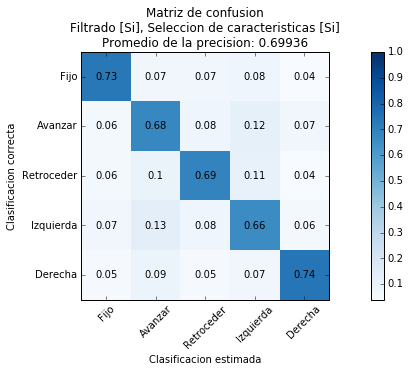

In [63]:
%matplotlib inline



def plot_confusion_matrix(cm, res, names, title, cmap=plt.cm.Blues):
    results = Counter(y_test)
    no_values = []
    for _, value in results.iteritems():
        no_values.append(value)
    no_values = np.array(no_values)
    conf_mat = np.zeros((len(no_values),len(no_values)))
    conf_mat = conf_mat + cm
    conf_mat = conf_mat.T
    avg_acc = np.trace(conf_mat)/np.sum(no_values)
    conf_mat_norm = conf_mat/no_values # Normalizing the confusion matrix
    conf_mat2 = np.around(conf_mat_norm,decimals=2) # rounding to display in figure
    conf_mat2 = conf_mat2.T
    plt.imshow(conf_mat2, interpolation='nearest', vmax=1.0, cmap=plt.get_cmap('Blues'))
    plt.title(title + '\nPromedio de la precision: {}'.format(avg_acc))
    plt.colorbar()
    for x in xrange(len(names)):
        for y in xrange(len(names)):
            plt.annotate(str(conf_mat2[x][y]),xy=(y,x),ha='center',va='center')
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Clasificacion correcta')
    plt.xlabel('Clasificacion estimada')
    #plt.show()
    
    
names = ['Fijo', 'Avanzar', 'Retroceder', 'Izquierda', 'Derecha']
#y_pred = svm.predict(X_test_std)    
#y_2_pred = estimators_array[1].predict(X2_test_std)    
cm = confusion_matrix(y_test, y_pred)
#cm2 = confusion_matrix(y2_test, y_2_pred)
plt.figure(figsize=(12,5))
#plt.subplot(121)
plot_confusion_matrix(cm, y_test, names, title='Matriz de confusion\nFiltrado [Si], Seleccion de caracteristicas [Si]')
#plt.show()
#plt.subplot(122)
#plt.figure()
#plot_confusion_matrix(cm2, names, title='Matriz de confusion (Filtrado, con seleccion de caracteristicas)')
plt.show()

In [ ]:
Order of results
Training score, Test score, Time, Features, SVM parameters

0.97875, 0.98890, 454.49500s, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], {'kernel': 'rbf', 'C': 32, 'random_state': 0, 'decision_function_shape': 'ovr', 'gamma': 0.5}
0.95201, 0.97300, 462.31800s, [1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13], {'kernel': 'rbf', 'C': 8, 'random_state': 0, 'decision_function_shape': 'ovr', 'gamma': 2}

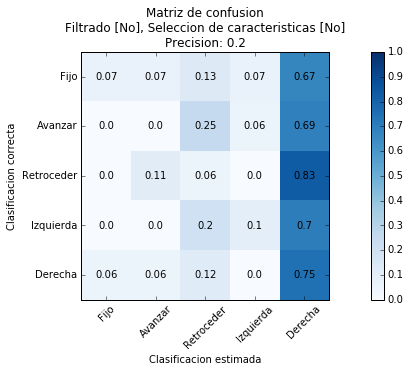

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

"""
def plot_confusion_matrix(cm, names, title, cmap=plt.cm.Blues):
    #plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Clasificacion correcta')
    plt.xlabel('Clasificacion estimada')
    #plt.show()
"""
def plot_confusion_matrix(cm, res, names, title, cmap=plt.cm.Blues):
    results = Counter(y_test)
    no_values = []
    for _, value in results.iteritems():
        no_values.append(value)
    no_values = np.array(no_values)
    conf_mat = np.zeros((len(no_values),len(no_values)))
    conf_mat = conf_mat + cm
    conf_mat = conf_mat.T
    avg_acc = np.trace(conf_mat)/np.sum(no_values)
    conf_mat_norm = conf_mat/no_values # Normalizing the confusion matrix
    conf_mat2 = np.around(conf_mat_norm,decimals=2) # rounding to display in figure
    conf_mat2 = conf_mat2.T
    plt.imshow(conf_mat2, interpolation='nearest', vmax=1.0, cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()
    for x in xrange(len(names)):
        for y in xrange(len(names)):
            plt.annotate(str(conf_mat2[x][y]),xy=(y,x),ha='center',va='center')
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Clasificacion correcta')
    plt.xlabel('Clasificacion estimada')

names = ['Fijo', 'Avanzar', 'Retroceder', 'Izquierda', 'Derecha']
y_test = [0, 2, 2, 2, 0, 1, 4, 4, 0, 3, 4, 2, 3, 4, 2, 0, 1, 4, 0, 1, 1, 3, 4, 2, 3, 0, 4, 4, 3, 1, 0, 3, 4, 4, 0, 2, 1, 1, 1, 1, 4, 2, 2, 3, 2, 2, 0, 1, 2, 0, 0, 4, 4, 3, 1, 0, 3, 4, 4, 0, 2, 1, 1, 1, 1, 4, 2, 2, 3, 2, 2, 0, 1, 2, 0]
y_pred = [0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 1, 4, 2, 2, 4, 1, 3, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 2, 4, 3, 2, 2, 4, 4, 2, 4, 4, 1, 2, 4, 4]
tot = 0
for i in zip(y_test, y_pred):
    if(i[0] == i[1]):
        tot += 1
tot = tot / 75.0
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,5))

plot_confusion_matrix(cm, y_test, names, title='Matriz de confusion\nFiltrado [No], Seleccion de caracteristicas [No]\nPrecision: {}'.format(tot))

plt.show()